Lab 8: Guidelines for Open Channel Flow Experiments
---
- By **Moise Baraka** (TA - Fluid Mechanics Lab)
  - [mbaraka@ttu.edu](\mailto:mbaraka@ttu.edu)
  
- Fall 2024 (11-20-2024)

---

## Part I: Flow across a weir

In the first part of the experiment, you will compare the flow rate measured across the weir with the flow rate obtained from the apparatus. Note that **Manning's equation is not required for this part**.

- **How do you read the flow rate from the apparatus?**

The flow rate from the manometer is calculated using the formula:
$$
\log_{10}(Q) = \frac{\log_{10}(\Delta H) -1.47}{2.096} \implies \boxed{\textcolor{blue}{Q_m = 10^{\frac{\log_{10}(\Delta H) -1.47}{2.096}} ,\quad (cfs)}}
$$

Where $\Delta H \, (ft)$ is the difference between the readings of the two manometers: $\Delta H = H_1-H_2$

- **Flow across the V-notch weir:**

The flow rate across the V-notch weir is determined using the following equation:
$$
Q_{w} = \frac{8}{15} \sqrt{2g}\, C_e \tan\left(\frac{\theta}{2}\right) \, (h+k)^{5/2}
$$

Here, $C_e$ is a coefficient based on the angle $\theta$ of the weir in degrees. $k$ is the head correction coefficient. The values for $C_e$ and $k$ are functions of the angle $\theta$ of the V-notch weir:
$$
C_e = 0.6072 - 0.0008745\cdot \theta + 0.000006104 \cdot \theta^2
$$

$$
k = \frac{0.002}{\sin\left(\frac{\theta}{2}\right)}, \quad (\text{for } \, 40^\circ \leq \theta \leq 90^\circ ), \quad (ft)
$$

Since the angle of our V-notch weir is $90^\circ$, we say:

$$
\boxed{\textcolor{blue}{Q_{w} = \frac{8}{15} \sqrt{2g}\, C_e \, (h+k)^{5/2},\quad C_e = 0.578, \quad \text{and } k = 0.862\,mm\,(0.00283\,ft)}}
$$

**Note:** You will have to plot two curves on the same figure:

(1) $\log(Q_m) (h)$: manometer flow rates vs weir water heights
    
(2) $\log(Q_w) (h)$: weir flow rates vs weir water heights.


## Part 2: Channel roughness

In the second part of the experiment, you will estimate the channel roughness coefficient $n$. To do so, 

- Calculate flow rates using the equation from Part I based on the manometer readings:

$\log_{10}(Q) = \frac{\log_{10}(\Delta H) -1.47}{2.096}$
- Then, compute the wetted perimeter $P$, the area $A$, and the hydraulic radius $R=\frac{A}{P}$ from the measured $h$ and the channel width $B$.

Knowing the flow rate $Q$, the bed slope $S_0$, and other calculated dimensions above, **use Manning's equation** to solve for $n$.
$$
Q=\frac{K_n}{n} \cdot A \cdot R^{2/3} \cdot S_0 \implies \boxed{\textcolor{blue}{n = \frac{K_n}{Q} \cdot A \cdot R^{2/3} \cdot S_0}}
$$

Here, $K_n$ is a unit conversion quantity. Take $K_n=1.0$ if using S.I units or $K_n=1.49$ for US customary units.


**Remark:** 

To verify your results, rewrite Manning's equation as a linear relationship and then plot it. To do this, we pose $Y=Q$ and $x=K_n \cdot A \cdot R^{2/3} \cdot S_0$, then Manning's equation can be written as a linear equation of the form:

$$
\boxed{\textcolor{red}{Y = \frac{1}{n} x}}
$$

- Use the data you gathered in part II, regardless of the slopes, and plot $Q$ versus $x=K_n \cdot A \cdot R^{2/3} \cdot S_0$.
- Compare the slope of the plotted curve with the $\frac{1}{n}$ to critique and validate your estimated mean roughness coefficient.

### References

[(1) Discharge Characteristics of Triangular-notch Thin-plate Weirs](https://pubs.usgs.gov/wsp/1617b/report.pdf)

[(2) Open Channel Flow: Instructor Notebook - Dr. Cleveland](http://54.243.252.9/ce-3105-webroot/ce3105notes/_build/html/lessons/laboratory8/laboratory8.html)

### Practical Example

In [1]:
#-------------------------------------
#             SCRIPTS
#-------------------------------------

import numpy as np
import math
import matplotlib.pyplot as plt

# Define parameters and data
g = 32.2    # ft/s2
k = 0.00283 # ft
Ce = 0.578  # discharge coefficient

h = [65.67, 76.75, 81.56, 87.17, 97.02]  # mm (weir heights)
h = [i*0.00328084 for i in h]            # convert the heights in ft
#print(h)

# Manometer reading
H_1 = [2.31, 2.41, 2.46, 2.53, 2.71] # ft
H_2 = [2.11, 1.97, 1.88, 1.76, 1.43]

# Denivelation from the manometer
delta_h = [i-j for i,j in zip(H_1, H_2)] #H_1-H_2

# Part1: Main program
# Compute flow rates from the manometers
def compute_flowrates(h, delta_h):
    
    # Flow rates from manometer (Qm) and weir (Qw)
    Qm = 10**((np.log10(delta_h) -1.47) / 2.096)
    Qw = [8/15 * math.sqrt(2*g) * Ce * (i+k)**2.5 for i in h]
    
    # print Qm and Qw
    print("- The flow across the manometers Qm=", np.round(Qm, 4), "cfs")
    print("- The flow across the weir Qw=", np.round(Qw, 4), "cfs")

    # regression
    x = h
    ym = np.log(Qm)
    yw = np.log(Qw)
    
    mm, bm = np.polyfit(x, ym, 1)  # manometers
    mw, bw = np.polyfit(x, yw, 1)  # weir
    
    # Let us plot log(Qm)(h), log(Qw)(h)
    plt.scatter(h, np.log(Qm), label="Manometer data ", color="red")
    plt.scatter(h, np.log(Qw), label="Weir data ", color="green")
    plt.plot(x, [mm*i+bm for i in x], "--", label=f'Fit:  $\\log(Q_m)={mm:.3f}h+({bm:.2f})$')
    plt.plot(x, [mw*i+bw for i in x], "--", label=f'Fit: $\\log(Q_w)={mw:.3f}h+({bw:.2f})$')
    plt.title("Plot for Part I")
    plt.xlabel("Weir heights $h$ (ft)")
    plt.ylabel("Flow rates $\\log(Q)$ (cfs)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Let us fit a linear regression that predicts Qw based on Qm
    x = Qm
    y = Qw
    
    # Regression of degree 1
    m, b = np.polyfit(x, y, 1)  # manometers
    
    # plots
    plt.scatter(Qm, Qw, label="Observations", color="red")
    plt.plot(x, [m*i+b for i in x], "--", label=f'Fit:  $Q_w={m:.3f}Q_m+({b:.2f})$')
    plt.title("Relation $Q_w$ and $Q_m$")
    plt.xlabel("$Q_m$ (cfs)")
    plt.ylabel("$Q_w$ (cfs)")
    plt.legend()
    plt.grid(True)
    plt.show()
    return Qm, Qw, m, b


-------- Results for team 1 ------- 

- The flow across the manometers Qm= [0.0923 0.1344 0.1534 0.1756 0.2238] cfs
- The flow across the weir Qw= [0.0551 0.0809 0.0941 0.1109 0.1446] cfs


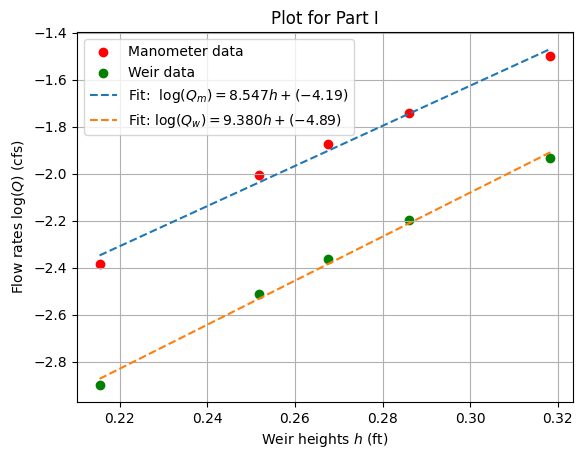

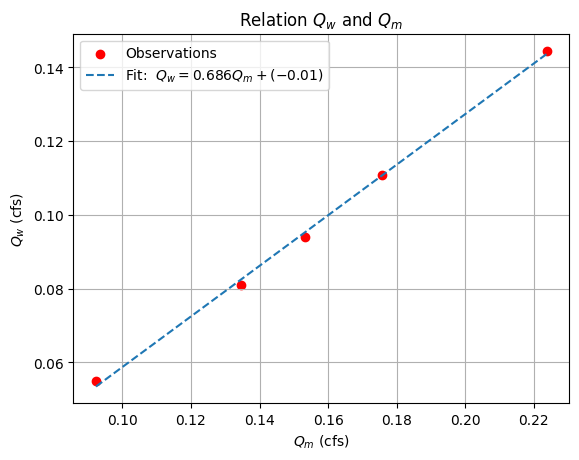

In [2]:
#Run part 1 for team 1
print("-------- Results for team 1 ------- \n")
Qm, Qw, m, b = compute_flowrates(h, delta_h)


**Note:**

As established from the linear regression, the relationship between the flow rate over the weir $Q_w$ and the upstream flow rate from the manometer readings $(Q_m)$ is given by:
$$
Q_w = 0.672 Q_m -0.01,
$$

This relationship allows us to estimate the flow reaching the rocky-bed region under experimental conditions where the weir is present. The estimated $Q_w$ can then be used to calculate Manning’s coefficient $n$ for the rocky-bed region. 

In the absence of the weir, the total upstream flow $Q_m$ would directly enter the rocky-bed region, as there would be no division or obstruction caused by the weir. In this case, Manning’s coefficient will be estimated using this direct flow value.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Input data
delta_h1 = [2.29-2.14, 2.46-1.88, 2.8-1.28]  # delta_h (ft) for slope 1
delta_h2 = [2.3-2.1, 2.4-1.96, 2.79-1.28]  # delta_h (ft) for slope 2
delta_h3 = [2.39-1.99, 2.47-1.86, 2.74-1.41]  # delta_h (ft) for slope 3
delta_h_tot = [delta_h1, delta_h2, delta_h3]  # group together

hw1 = [40.32, 62.09, 71.84]  # mm (flow heights)
hw2 = [39.6, 51.36, 64.36]  # mm (flow heights)
hw3 = [44.02, 55.14, 65.23]  # mm (flow heights)
hw_tot = [hw1, hw2, hw3]  # group together

slopes = [3/100, 5/100, 7/100]  # bed slopes
width = 0.3048 * 3.28084  # ft (channel width)

# Conversion factor
Kn = 1.49  # for SI to imperial conversion


- **Mean Roughness (n):** $\bar{n}=0.1589$

- **Standard Deviation of Roughness:** $\sigma_n= 0.0229$

- **Fitted slope of the regression:** $s = 7.409$

- **The ratio** $\frac{1}{\bar{n}} = 6.294$

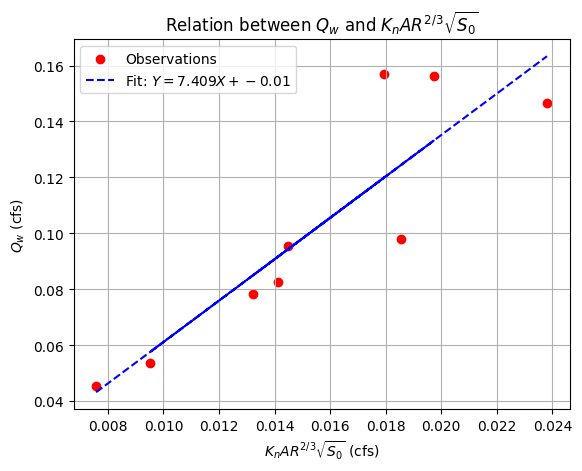

   Roughness (n)         X         Y
0       0.167098  0.007579  0.045358
1       0.151931  0.014493  0.095389
2       0.114426  0.017941  0.156791
3       0.177998  0.009519  0.053479
4       0.171277  0.014112  0.082395
5       0.126224  0.019725  0.156267
6       0.169016  0.013233  0.078295
7       0.189554  0.018567  0.097951
8       0.162471  0.023803  0.146507


In [4]:
import pandas as pd
from IPython.display import display, Math, Markdown

def compute_manning(delta_h_tot, hw_tot, slopes, width, m=1.0, b=0.0, Kn=1.49, weir_in_place=True):
    # Prepare containers for all roughness values and regression data
    all_n = []
    all_x = []
    all_y = []

    # Loop through slopes and corresponding data
    for delta_h, hw, So in zip(delta_h_tot, hw_tot, slopes):
        # Compute measured discharge Qm
        Qm = 10 ** ((np.log10(delta_h) - 1.47) / 2.096)  # manometer formula for measured discharge

        # Compute flow area (A) and wetted perimeter (P)
        hw_ft = np.array(hw) * 0.00328084  # convert mm to ft
        A = width * hw_ft  # area
        P = width + 2 * hw_ft  # wetted perimeter
        R = A / P  # hydraulic radius

        # Adjust discharge Qw if weir is in place
        if weir_in_place:
            Qw = m * Qm + b
        else:
            Qw = Qm

        # Compute roughness (n)
        n = Kn / Qw * A * R ** (2 / 3) * np.sqrt(So)
        all_n.extend(n)  # Collect all roughness values

        # Prepare data for regression
        x = Kn * A * R ** (2 / 3) * np.sqrt(So)  # independent variable
        y = Qw  # dependent variable
        all_x.extend(x)
        all_y.extend(y)

    # Convert all collected roughness data into a single DataFrame
    df = pd.DataFrame({
        "Roughness (n)": all_n,
        "X": all_x,
        "Y": all_y
    })

    # Compute aggregated statistics
    n_mean = np.mean(all_n)
    n_std = np.std(all_n)

    # Perform regression: Y = s * x + k
    all_x = np.array(all_x)
    all_y = np.array(all_y)
    s, k = np.polyfit(all_x, all_y, 1)

    # Print results
    display(Markdown(f"- **Mean Roughness (n):** $\\bar{{n}}={n_mean:.4f}$"))
    display(Markdown(f"- **Standard Deviation of Roughness:** $\\sigma_n= {n_std:.4f}$"))
    display(Markdown(f"- **Fitted slope of the regression:** $s = {s:.3f}$"))
    display(Markdown(f"- **The ratio** $\\frac{{1}}{{\\bar{{n}}}} = {1 / n_mean:.3f}$"))

    # Plot results
    plt.scatter(all_x, all_y, label="Observations", color="red")
    plt.plot(all_x, s * all_x + k, "--", label=f'Fit: $Y = {s:.3f}X + {k:.2f}$', color="blue")
    plt.title("Relation between $Q_w$ and $K_n A R^{2/3} \\sqrt{S_0}$")
    plt.xlabel("$K_n A R^{2/3} \\sqrt{S_0}$ (cfs)")
    plt.ylabel("$Q_w$ (cfs)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return df, n_mean, n_std, s, k

# Call the function
df_results, aggregated_mean, aggregated_std, regression_slope, regression_intercept = compute_manning(
    delta_h_tot, hw_tot, slopes, width, m=m, b=b
)

# Display DataFrame
print(df_results)


## Remarks



Mean roughness values (n): [np.float64(0.14448516631553643), np.float64(0.1584994802207125), np.float64(0.17368030564577844)]
Standard deviations of roughness: [np.float64(0.022138539880094135), np.float64(0.022986555658343344), np.float64(0.011538285996667822)]
Fitted slope of the regression s = 7.409
1/n_mean = 6.294


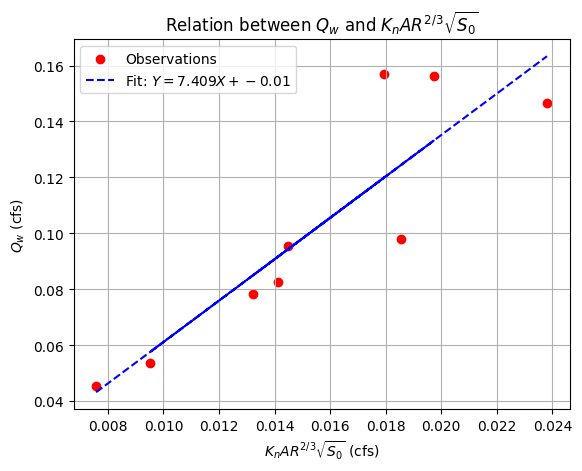

In [5]:
def compute_manning(delta_h_tot, hw_tot, slopes, width, m=1.0, b=0.0, Kn=1.49, weir_in_place=True):
    all_x = []
    all_y = []
    n_means = []
    n_stds = []
    
    for delta_h, hw, So in zip(delta_h_tot, hw_tot, slopes):
        # Compute measured discharge Qm
        Qm = 10 ** ((np.log10(delta_h) - 1.47) / 2.096)  # manometer formula for measured discharge
        
        # Compute flow area (A) and wetted perimeter (P)
        hw_ft = np.array(hw) * 0.00328084  # convert mm to ft
        A = width * hw_ft  # area
        P = width + 2 * hw_ft  # wetted perimeter
        R = A / P  # hydraulic radius
        
        # Adjust discharge Qw if weir is in place
        if weir_in_place:
            Qw = m * Qm + b
        else:
            Qw = Qm
        
        # Compute roughness (n)
        n = Kn / Qw * A * R ** (2 / 3) * np.sqrt(So)
        n_means.append(np.mean(n))
        n_stds.append(np.std(n))
        
        # Prepare data for regression
        x = Kn * A * R ** (2 / 3) * np.sqrt(So)  # independent variable
        y = Qw  # dependent variable
        
        all_x.extend(x)
        all_y.extend(y)
    
    # Compute overall regression: Y = s * x + k
    all_x = np.array(all_x)
    all_y = np.array(all_y)
    s, k = np.polyfit(all_x, all_y, 1)
    
    # Print statistics
    print(f"Mean roughness values (n): {n_means}")
    print(f"Standard deviations of roughness: {n_stds}")
    print(f"Fitted slope of the regression s = {s:.3f}")
    print(f"1/n_mean = {1 / np.mean(n_means):.3f}")
    
    # Plot results
    plt.scatter(all_x, all_y, label="Observations", color="red")
    plt.plot(all_x, s * all_x + k, "--", label=f'Fit: $Y = {s:.3f}X + {k:.2f}$', color="blue")
    plt.title("Relation between $Q_w$ and $K_n A R^{2/3} \\sqrt{S_0}$")
    plt.xlabel("$K_n A R^{2/3} \\sqrt{S_0}$ (cfs)")
    plt.ylabel("$Q_w$ (cfs)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return n_means, n_stds, s, k

# Call the function
n_means, n_stds, s, k = compute_manning(delta_h_tot, hw_tot, slopes, width, m=m, b=b)
